In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/loan-recovery.csv')

In [9]:
df.sample(5)

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
141,BRW_142,24,Female,Self-Employed,173056,3,LN_142,1772560,48,7.06,...,0.000000e+00,7.295453e+05,15198.86,On-Time,1,165,Fully Recovered,1,Legal Notice,No
72,BRW_73,35,Female,Salaried,155272,1,LN_73,1587111,48,8.89,...,0.000000e+00,2.405731e+05,5011.94,Missed,0,0,Partially Recovered,9,Debt Collectors,No
119,BRW_120,47,Male,Self-Employed,103009,2,LN_120,608963,72,14.73,...,7.545608e+05,4.900327e+05,6806.01,On-Time,0,0,Fully Recovered,0,Debt Collectors,No
498,BRW_499,54,Male,Salaried,158401,2,LN_499,1769890,24,11.19,...,1.272774e+06,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No
227,BRW_228,40,Female,Salaried,93714,1,LN_228,597219,48,16.72,...,4.253905e+05,1.130575e+05,2355.37,On-Time,2,75,Fully Recovered,3,Calls,No


In [4]:
df.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [5]:
df.isnull().sum()

,0
Borrower_ID,0
Age,0
Gender,0
Employment_Type,0
Monthly_Income,0
Num_Dependents,0
Loan_ID,0
Loan_Amount,0
Loan_Tenure,0
Interest_Rate,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

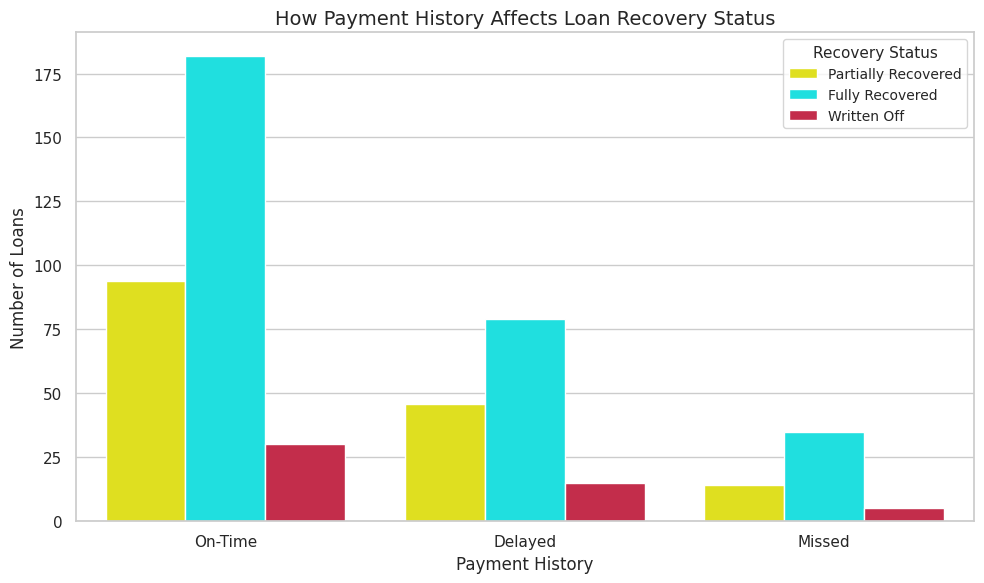

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.countplot(data=df, x="Payment_History", hue="Recovery_Status",
              palette={"Fully Recovered": "cyan", "Written Off": "crimson","Partially Recovered":"yellow"})

plt.title("How Payment History Affects Loan Recovery Status", fontsize=14)
plt.xlabel("Payment History", fontsize=12)
plt.ylabel("Number of Loans", fontsize=12)
plt.legend(title="Recovery Status", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.show()

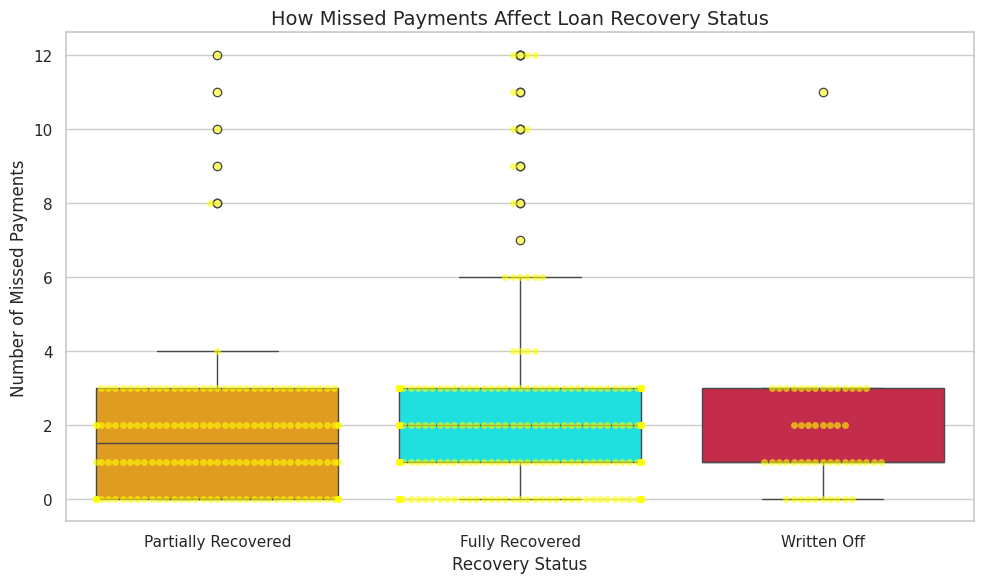

In [23]:
plt.figure(figsize=(10, 6))

# Create boxplot with swarmplot for individual data points
sns.boxplot(data=df, x="Recovery_Status", y="Num_Missed_Payments",
            palette={"Fully Recovered": "cyan", "Written Off": "crimson","Partially Recovered":"orange"})

# Overlay all data points (like points='all' in Plotly)
sns.swarmplot(data=df, x="Recovery_Status", y="Num_Missed_Payments",
              color="yellow", alpha=0.6, size=5)

# Set title and axis labels
plt.title("How Missed Payments Affect Loan Recovery Status", fontsize=14)
plt.xlabel("Recovery Status", fontsize=12)
plt.ylabel("Number of Missed Payments", fontsize=12)

plt.tight_layout()
plt.show()

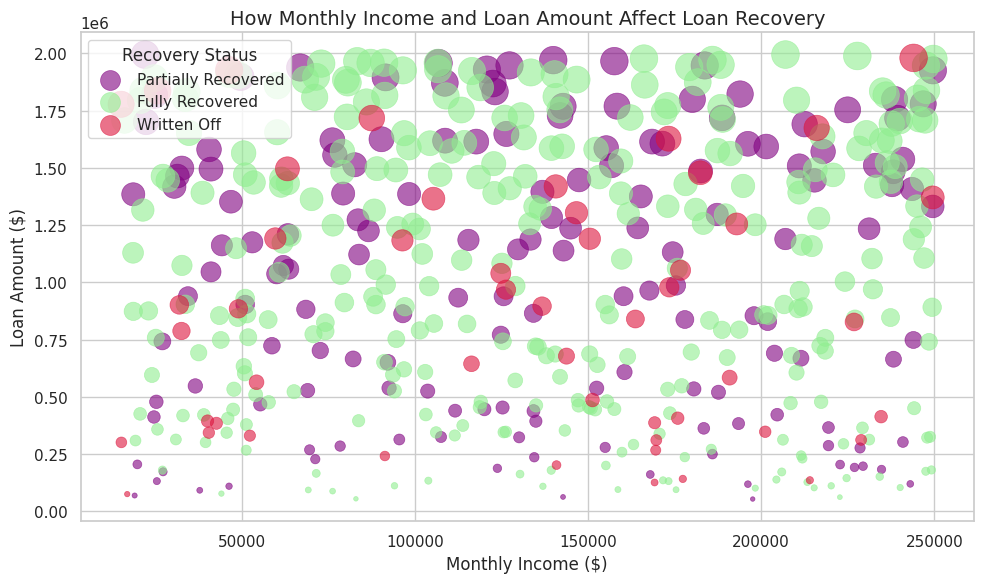

In [21]:
plt.figure(figsize=(10, 6))
colors = {"Fully Recovered": "lightgreen", "Written Off": "crimson","Partially Recovered":"purple"}


for status in df['Recovery_Status'].unique():
    subset = df[df['Recovery_Status'] == status]
    plt.scatter(subset['Monthly_Income'], subset['Loan_Amount'],
                s=subset['Loan_Amount'] / 5000,
                c=colors[status],
                label=status,
                alpha=0.6,
                linewidths=0.5)


plt.title("How Monthly Income and Loan Amount Affect Loan Recovery", fontsize=14)
plt.xlabel("Monthly Income ($)", fontsize=12)
plt.ylabel("Loan Amount ($)", fontsize=12)
plt.legend(title="Recovery Status")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features])

In [33]:
knn = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Borrower_Segment'] = knn.fit_predict(df_scaled)

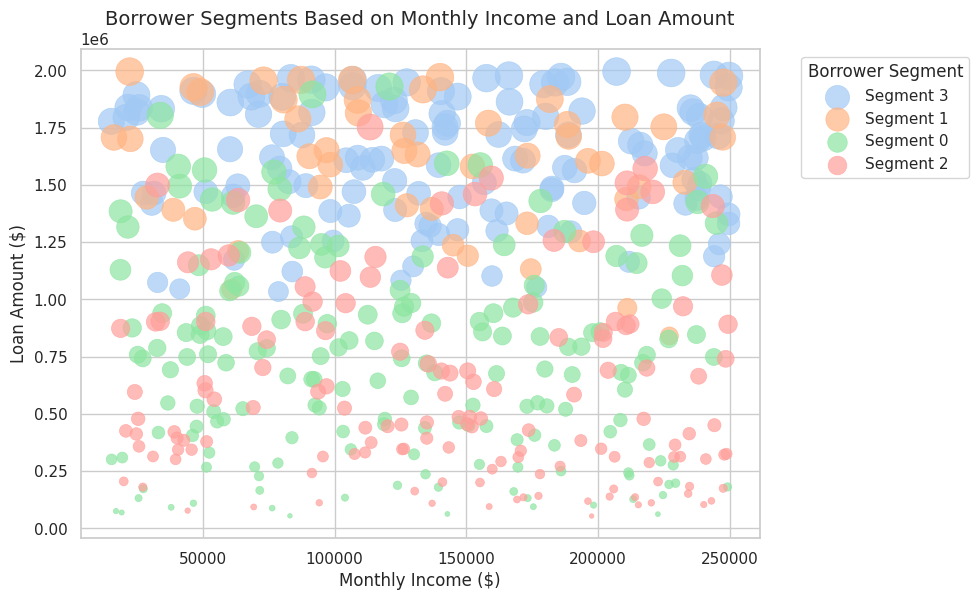

In [34]:

plt.figure(figsize=(10, 6))

df['Borrower_Segment'] = df['Borrower_Segment'].astype(str)

segments = df['Borrower_Segment'].unique()
palette = sns.color_palette("pastel", len(segments))
color_map = dict(zip(segments, palette))

for i in segments:
    subset = df[df['Borrower_Segment'] == i]
    plt.scatter(subset['Monthly_Income'], subset['Loan_Amount'],
                s=subset['Loan_Amount'] / 5000,  # adjust size scaling
                color=color_map[i],
                alpha=0.7,
                label=f"Segment {i}",
                linewidths=0.5)

# Set title and axis labels
plt.title("Borrower Segments Based on Monthly Income and Loan Amount", fontsize=14)
plt.xlabel("Monthly Income ($)", fontsize=12)
plt.ylabel("Loan Amount ($)", fontsize=12)
plt.legend(title="Borrower Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
df['Borrower_Segment']=df['Borrower_Segment'].replace({
    '0': 'Moderate Income, High Loan Burden',
    '1': 'High Income, Low Default Risk',
    '2': 'Moderate Income, Medium Risk',
    '3': 'High Loan, Higher Default Risk'
})

In [42]:
df

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken,Borrower_Segment
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No,"High Loan, Higher Default Risk"
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No,"High Income, Low Default Risk"
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No,"High Loan, Higher Default Risk"
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No,"High Loan, Higher Default Risk"
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No,"Moderate Income, High Loan Burden"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BRW_496,46,Female,Salaried,248483,1,LN_496,740796,72,16.59,...,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No,"Moderate Income, Medium Risk"
496,BRW_497,30,Female,Salaried,243590,3,LN_497,1408126,60,11.03,...,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No,"Moderate Income, Medium Risk"
497,BRW_498,46,Female,Salaried,113864,2,LN_498,375203,48,9.16,...,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No,"Moderate Income, Medium Risk"
498,BRW_499,54,Male,Salaried,158401,2,LN_499,1769890,24,11.19,...,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No,"High Income, Low Default Risk"


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df['High_Risk_Flag'] = df['Borrower_Segment'].apply(lambda x: 1 if x in ['High Loan, Higher Default Risk', 'Moderate Income, High Loan Burden'] else 0)

features = ['Age', 'Monthly_Income', 'Loan_Amount', 'Loan_Tenure', 'Interest_Rate',
            'Collateral_Value', 'Outstanding_Loan_Amount', 'Monthly_EMI', 'Num_Missed_Payments', 'Days_Past_Due']
X = df[features]
y = df['High_Risk_Flag']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [47]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [52]:
risk_score=rf.predict_proba(X_test)[:,1]

df_test = X_test.copy()
df_test['Risk_Score'] = risk_score
df_test['Predicted_High_Risk'] = (df_test['Risk_Score'] > 0.5).astype(int)

df_test = df_test.merge(df[['Borrower_ID', 'Borrower_Segment', 'Recovery_Status', 'Collection_Method', 'Collection_Attempts', 'Legal_Action_Taken']],
                        left_index=True, right_index=True)

In [53]:
def assign_recovery_strategy(risk_score):
    if risk_score > 0.75:
        return "Immediate legal notices & aggressive recovery attempts"
    elif 0.50 <= risk_score <= 0.75:
        return "Settlement offers & repayment plans"
    else:
        return "Automated reminders & monitoring"

df_test['Recovery_Strategy'] = df_test['Risk_Score'].apply(assign_recovery_strategy)

df_test.head()

,Age,Monthly_Income,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Risk_Score,Predicted_High_Risk,Borrower_ID,Borrower_Segment,Recovery_Status,Collection_Method,Collection_Attempts,Legal_Action_Taken,Recovery_Strategy
361,55,141888,1753834,72,17.81,1.601439e+06,1.475467e+06,20492.60,3,78,0.84,1,BRW_362,"High Loan, Higher Default Risk",Fully Recovered,Debt Collectors,2,No,Immediate legal notices & aggressive recovery ...
73,28,79178,1482769,72,6.39,0.000000e+00,3.812657e+05,5295.36,2,7,0.97,1,BRW_74,"Moderate Income, High Loan Burden",Fully Recovered,Calls,3,No,Immediate legal notices & aggressive recovery ...
374,35,237374,846710,36,12.84,1.037463e+06,6.279152e+05,17442.09,0,0,0.99,1,BRW_375,"Moderate Income, High Loan Burden",Fully Recovered,Legal Notice,0,No,Immediate legal notices & aggressive recovery ...
155,22,133516,1917306,24,7.66,0.000000e+00,1.374051e+06,57252.12,1,166,0.26,0,BRW_156,"High Income, Low Default Risk",Fully Recovered,Debt Collectors,2,No,Automated reminders & monitoring
104,61,150542,1190844,12,15.14,0.000000e+00,1.015521e+06,84626.74,3,147,0.13,0,BRW_105,"High Income, Low Default Risk",Written Off,Legal Notice,10,No,Automated reminders & monitoring
